#### Bi 410/510 (Fall 2019)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

**Group Members**

If this is a group submission edit this cell to add the names and e-mail addresses of the other people who worked on the project.
* Alex Wong (awong8@uoregon.edu)
* Dorian Yeh (dyeh@uoregon.edu)
* Peregrine Painter (ppainter@uoregon.edu)

# <span style="color:seagreen;">Project 7: &nbsp; Pandas</span>

###  <span style="color:seagreen">Data</span>

For this project you will create a Pandas data frame by reading the data in `oregon_football_extended.csv`.  

**This is not the same file you used for the previous project.**

The new file has the same football game data that was in the CSV file for Project 6, but it has two extra fields at the end of each line:
* a field named `location` will have an `H` if the game was a home game, `A` if it was an away game, or `N` if it was played at a neutral site
* a field named `league_game` will be `Y` if the opponent was a team that is currently in the Pac-12, otherwise it's an `N`

To download the file from the Bi 410 server type this command in a Docker shell:
```
$ download oregon_football_extended.csv
```
Save the data file in the same folder as this notebook.

###  <span style="color:seagreen">Instructions</span>

Exercise 6.4 is similar to exercises on other projects:  you need to write the definition of a function in a code cell, and then use other code cells to call your function to test it.

For the other exercises there will be a code cell that says "YOUR CODE HERE".  Use that cell for your solution to a project, _e.g._ to write the Python code that creates a Pandas frame or draws a figure.

Some exercises also include a code cell with a comment that says "We will execute this code cell to check your solution".  The cells are read-only: you can execute these cells to test your work, but you won't be able to modify them.

**IMPORTANT:** Do not copy, delete, or move the solution cells or the test cells.

You can add additional cells for your own "sandbox" or tests, but do not copy and paste an existing test or project cell.

###  <span style="color:seagreen">Imports</span> 

Execute these code cells to import Pandas, Numpy, and PyPlot and to tell Matplotlib to display graphics in the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

###  <span style="color:seagreen">Exercise 6.1: Create a DataFrame</span> 

Use the code cell below to create a DataFrame object by reading the data from `oregon_football_extended.csv`.  Save the frame using the name `fb`.

In [3]:
fb = pd.read_csv('oregon_football_extended.csv')

In [4]:
type(fb)

pandas.core.frame.DataFrame

In [5]:
# We will execute this code cell to check your solution.

fb.head(5)

,date,season,opponent,points_scored,points_allowed,location,league_game
0,1916-10-07,1916,Willamette,97,0,H,N
1,1916-10-14,1916,Multnomah A.C.,28,0,H,N
2,1916-10-21,1916,California,39,14,A,Y
3,1916-11-04,1916,Washington,0,0,H,Y
4,1916-11-11,1916,Washington State,12,3,H,Y


In [6]:
# We will execute this code cell to check your solution.

fb.tail(5)

,date,season,opponent,points_scored,points_allowed,location,league_game
1063,2018-11-03,2018,UCLA,42,21,H,Y
1064,2018-11-10,2018,Utah,25,32,A,Y
1065,2018-11-17,2018,Arizona State,31,29,H,Y
1066,2018-11-23,2018,Oregon State,55,15,A,Y
1067,2018-12-31,2018,Michigan State,7,6,N,N


In [7]:
fb.columns

Index(['date', 'season', 'opponent', 'points_scored', 'points_allowed',
       'location', 'league_game'],
      dtype='object')

In [8]:
fb.index

RangeIndex(start=0, stop=1068, step=1)

###  <span style="color:seagreen">Exercise 6.2: Total Number of Games</span> 

Write a Python statement in this code cell that will show the total number of games played.

In [9]:
len(fb)

1068

###  <span style="color:seagreen">Exercise 6.3: Point Differential</span> 

Fill in the code cell below with a statement that will add a new column named `difference` to the frame, where the values in that column are the difference between points scored and points allowed.  Here is what the first few rows in the new frame should look like:
```
         date  season          opponent  points_scored  points_allowed  location  league_game  difference
0  1916-10-07    1916        Willamette             97               0         H            N          97
1  1916-10-14    1916    Multnomah A.C.             28               0         H            N          28
2  1916-10-21    1916        California             39              14         A            Y          25
3  1916-11-04    1916        Washington              0               0         H            Y           0
4  1916-11-11    1916  Washington State             12               3         H            Y           9

```

In [10]:
np.subtract(5,3)

2

In [11]:
difference = np.subtract(fb['points_scored'],fb['points_allowed'])

fb["difference"] = difference

In [12]:
difference

0       97
1       28
2       25
3        0
4        9
        ..
1063    21
1064    -7
1065     2
1066    40
1067     1
Length: 1068, dtype: int64

In [13]:
# We will execute this code cell to check your solution.

fb.head(5)

,date,season,opponent,points_scored,points_allowed,location,league_game,difference
0,1916-10-07,1916,Willamette,97,0,H,N,97
1,1916-10-14,1916,Multnomah A.C.,28,0,H,N,28
2,1916-10-21,1916,California,39,14,A,Y,25
3,1916-11-04,1916,Washington,0,0,H,Y,0
4,1916-11-11,1916,Washington State,12,3,H,Y,9


In [ ]:
fb.tail(10)

###  <span style="color:seagreen">Exercise 6.4: Overall Record</span> 

Fill in the code cell below with the definition of a function that will compute the overall win-loss record for the Ducks. Since ties were allowed in college football until the 1980s you will find several games where the points scored by each team are the same.  The function should return three values: the number of games won, the number lost, and the number of ties.

The expected result is:
```
>>> won_lost_tied(fb)
(579, 455, 34)
```

#### Code 

In [ ]:
def won_lost_tied(df):
    won = 0
    lost = 0
    tied = 0
    
    for s in df['difference']:
#         print(s)
        if s > 0:
            won += 1
        elif s < 0:
            lost += 1
        elif s == 0:
            tied += 1
    return(won, lost, tied)

In [ ]:
won_lost_tied(fb)

#### Test 

In [ ]:
assert won_lost_tied(fb) == (579, 455, 34)

###  <span style="color:seagreen">Exercise 6.5: Average Points Scored</span> 

Make a new frame named `fbs` (for "football summary") that has the mean number of points scored and mean number of points allowed in each season.  The new frame should look like this:
```
        points_scored  points_allowed  
season                                           
1916        30.500000        2.125000
1917        10.428571       10.571429
1918        13.500000        5.833333
1919        14.714286        5.714286
1920         6.166667        6.333333
...
```

In [21]:
fb

,date,season,opponent,points_scored,points_allowed,location,league_game,difference
0,1916-10-07,1916,Willamette,97,0,H,N,97
1,1916-10-14,1916,Multnomah A.C.,28,0,H,N,28
2,1916-10-21,1916,California,39,14,A,Y,25
3,1916-11-04,1916,Washington,0,0,H,Y,0
4,1916-11-11,1916,Washington State,12,3,H,Y,9
...,...,...,...,...,...,...,...,...
1063,2018-11-03,2018,UCLA,42,21,H,Y,21
1064,2018-11-10,2018,Utah,25,32,A,Y,-7
1065,2018-11-17,2018,Arizona State,31,29,H,Y,2
1066,2018-11-23,2018,Oregon State,55,15,A,Y,40


In [22]:
fbs = pd.DataFrame(
    fb.groupby('season').mean().drop(columns=['difference']))

In [23]:
# We will execute this code cell to check your solution.

fbs.head(5)

,points_scored,points_allowed
season,,
1916,30.500000,2.125000
1917,10.428571,10.571429
1918,13.500000,5.833333
1919,14.714286,5.714286
1920,6.166667,6.333333


###  <span style="color:seagreen">Exercise 6.6: Scatter Plot</span>

Create a scatter plot comparing the number of points allowed ($x$-axis) vs. number of points scored ($y$-axis) for every game. Your plot should look something like this:

<img src="https://pages.uoregon.edu/conery/Bi410/scored_vs_allowed.png">

**Optional:** The figure above uses equal size $x$ and $y$ axes, which are not required, but do provide a more accurate visualization.  If you want your figure to have the same shape save the result of the call to the `plot` method (the method returns a kind of object called an Axes) call a method named `set_aspect` (you can read about it in the `pyplot` documentation).

**Optional:** The figure above also colors each dot according to the point difference, but your plot does not need to include dot colors (and it does not need the color bar on the right side).

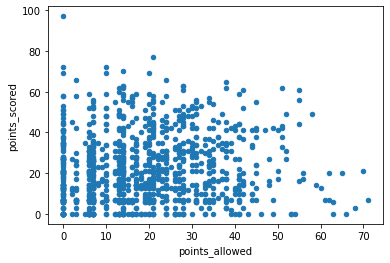

In [24]:
fb.plot.scatter(x='points_allowed', y='points_scored', #c='difference', colormap='viridis'
               )

###  <span style="color:seagreen">Exercise 6.7: Scoring Trends</span>

Create a plot that shows the total points scored in each season, with one line showing points scored by Oregon, and another line showing total points scored by the opponents (this is the same plot you made in the previous project, but now you'll be getting the data from a Pandas frame).

Your plot should look something like this, including the title and legend:

<img src="https://pages.uoregon.edu/conery/Bi410/football_trends_pandas.png">

Text(0, 0.5, 'points')

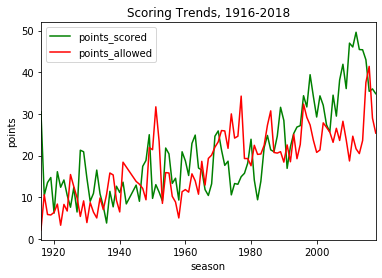

In [25]:
fbs.plot(color='g''r')
plt.title('Scoring Trends, 1916-2018')
plt.xlabel('season')
plt.ylabel('points')

###  <span style="color:seagreen">Exercise 6.8:  </span>

Create a new frame named `pac12` that shows the number of games played againt teams in the Pac-12, with separate columns for home, away, and neutral site games.
The final result should look something like this:
```
location                A     H    N
opponent                            
Arizona              22.0  20.0  1.0
Arizona State        18.0  19.0  NaN
California           42.0  34.0  1.0
Colorado             10.0   8.0  3.0
...
Washington State     45.0  43.0  2.0
```

**Optional:** to make a nicer looking table, figure out how to tell the function to use a 0 instead of a NaN for missing values (_e.g._ UO has never played ASU
at a neutral field so there's a NaN in row 2, column 3).  That will also fill the table with integers, so the result will be
```
location              A   H  N
opponent                      
Arizona              22  20  1
Arizona State        18  19  0
California           42  34  1
Colorado             10   8  3
...
Washington State     45  43  2
```

In [26]:
pac12_fb = fb[fb['league_game'] == 'Y']
pac12 = pd.pivot_table(pac12_fb, index='opponent', columns='location', values='date', aggfunc=np.size)
pac12.fillna(0, inplace=True)


In [27]:
# We will execute this code cell to check your solution.

pac12

location,A,H,N
opponent,,,
Arizona,22.0,20.0,1.0
Arizona State,18.0,19.0,0.0
California,42.0,34.0,1.0
Colorado,10.0,8.0,3.0
Oregon State,48.0,54.0,0.0
Southern California,32.0,26.0,2.0
Stanford,42.0,37.0,0.0
UCLA,38.0,30.0,1.0
Utah,15.0,17.0,0.0
